## KNN

In [ ]:
import numpy as np
import pandas as pd
# Make numpy values easier to read.
np.set_printoptions(precision=3, suppress=True)
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


df = pd.read_csv(
    "mydataset.csv",
    names=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH", "Value"])

df.head()

In [ ]:
df["Value"].unique()

In [ ]:
df.isnull().values.any()

In [ ]:
df["Value"] = df["Value"].map({250 :0, 300 :0, 500 :0, 600 :1, 700 :1, 750 :1, 1000 :2, 1200 :2, 1500 :2}).astype(int) #mapping numbers
df.head()

In [ ]:
x = df.drop("Value", axis = 1)
y = df["Value"]
print(y)

In [ ]:
x_data = df.drop(["Value"],axis=1)
y_data = df["Value"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH"])
data.head()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(data, y_data,test_size=0.2, random_state = 5)
knn_clf=KNeighborsClassifier()
knn_clf.fit(X_train,y_train)
ypred=knn_clf.predict(X_test) #These are the predicted output values

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
result = confusion_matrix(y_test, ypred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, ypred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,ypred)
print("Accuracy:",result2)

## Neural Network

In [32]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.utils.np_utils import to_categorical


df = pd.read_csv(
    "mydataset.csv",
    names=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH", "Value"])

df.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH,Value
0,25.6,30.0,77.0,343.0,85.5,8.02,4.8,129.1,22.35,0,20.0,27.0,40.0,826.51,750
1,25.6,30.0,77.0,392.0,90.2,4.12,3.8,97.9,10.00,0,34.9,20.5,37.6,826.51,750
2,25.6,30.0,79.0,76.0,93.4,4.66,2.6,66.0,14.20,0,34.9,20.5,37.6,826.51,750
3,25.6,30.0,75.0,92.0,92.5,3.21,3.5,83.4,14.40,0,17.0,17.0,37.0,826.51,750
4,25.6,30.0,85.0,96.0,92.7,4.59,4.0,103.2,22.35,0,34.9,20.5,37.6,826.51,750


In [33]:
df["Value"] = df["Value"].map({250 :0, 300 :0, 500 :0, 600 :1, 700 :1, 750 :1, 1000 :2, 1200 :2, 1500 :2}).astype(int) #mapping numbers
df.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH,Value
0,25.6,30.0,77.0,343.0,85.5,8.02,4.8,129.1,22.35,0,20.0,27.0,40.0,826.51,1
1,25.6,30.0,77.0,392.0,90.2,4.12,3.8,97.9,10.00,0,34.9,20.5,37.6,826.51,1
2,25.6,30.0,79.0,76.0,93.4,4.66,2.6,66.0,14.20,0,34.9,20.5,37.6,826.51,1
3,25.6,30.0,75.0,92.0,92.5,3.21,3.5,83.4,14.40,0,17.0,17.0,37.0,826.51,1
4,25.6,30.0,85.0,96.0,92.7,4.59,4.0,103.2,22.35,0,34.9,20.5,37.6,826.51,1


In [ ]:
x = df.drop("Value", axis = 1)
y = df["Value"]
print(y)

In [34]:
x_data = df.drop(["Value"],axis=1)
y_data = df["Value"]
MinMaxScaler = preprocessing.MinMaxScaler()
X_data_minmax = MinMaxScaler.fit_transform(x_data)
data = pd.DataFrame(X_data_minmax,columns=["Wt(kg)", "Mg/Kg", "HB", "PLTS", "MCV",
           "NEUT", "RETIC", "RETIC_A", "HB_F", "BIO",
           "BILI", "ALT", "AST", "LDH"])
data.head()

,Wt(kg),Mg/Kg,HB,PLTS,MCV,NEUT,RETIC,RETIC_A,HB_F,BIO,BILI,ALT,AST,LDH
0,0.27383,0.645161,0.547619,0.270266,0.179314,0.087964,0.112745,0.196348,0.109922,0.0,0.076142,0.125000,0.278195,0.218212
1,0.27383,0.645161,0.547619,0.309430,0.190287,0.044094,0.088235,0.147651,0.045431,0.0,0.151777,0.089674,0.260150,0.218212
2,0.27383,0.645161,0.563492,0.056860,0.197759,0.050169,0.058824,0.097862,0.067363,0.0,0.151777,0.089674,0.260150,0.218212
3,0.27383,0.645161,0.531746,0.069648,0.195657,0.033858,0.080882,0.125020,0.068407,0.0,0.060914,0.070652,0.255639,0.218212
4,0.27383,0.645161,0.611111,0.072846,0.196124,0.049381,0.093137,0.155923,0.109922,0.0,0.151777,0.089674,0.260150,0.218212


In [35]:
y_cat = to_categorical(y)
print(y_cat)

[[0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 ...
 [1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]]


In [36]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, y_cat, test_size=0.1)

In [37]:
model = Sequential()
model.add(Dense(256, input_shape = (14,), activation = "relu"))
model.add(Dense(512, activation = "relu"))
model.add(Dropout(0.2))
model.add(Dense(3, activation = "softmax"))
model.compile(Adam(learning_rate = 0.001), "categorical_crossentropy", metrics = ["accuracy"])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 256)               3840      
                                                                 
 dense_7 (Dense)             (None, 512)               131584    
                                                                 
 dropout_2 (Dropout)         (None, 512)               0         
                                                                 
 dense_8 (Dense)             (None, 3)                 1539      
                                                                 
Total params: 136,963
Trainable params: 136,963
Non-trainable params: 0
_________________________________________________________________


In [38]:
model.fit(x_train, y_train, batch_size=25, validation_split=0.1,  epochs=100, verbose=2)

Epoch 1/100
62/62 - 1s - loss: 0.9419 - accuracy: 0.5609 - val_loss: 0.8084 - val_accuracy: 0.5848 - 630ms/epoch - 10ms/step
Epoch 2/100
62/62 - 0s - loss: 0.7734 - accuracy: 0.6404 - val_loss: 0.6528 - val_accuracy: 0.7368 - 157ms/epoch - 3ms/step
Epoch 3/100
62/62 - 0s - loss: 0.7290 - accuracy: 0.6482 - val_loss: 0.6220 - val_accuracy: 0.7193 - 159ms/epoch - 3ms/step
Epoch 4/100
62/62 - 0s - loss: 0.7096 - accuracy: 0.6736 - val_loss: 0.6274 - val_accuracy: 0.6901 - 173ms/epoch - 3ms/step
Epoch 5/100
62/62 - 0s - loss: 0.6871 - accuracy: 0.6853 - val_loss: 0.5913 - val_accuracy: 0.7544 - 164ms/epoch - 3ms/step
Epoch 6/100
62/62 - 0s - loss: 0.6969 - accuracy: 0.6704 - val_loss: 0.5799 - val_accuracy: 0.7661 - 158ms/epoch - 3ms/step
Epoch 7/100
62/62 - 0s - loss: 0.6613 - accuracy: 0.6932 - val_loss: 0.5598 - val_accuracy: 0.7661 - 159ms/epoch - 3ms/step
Epoch 8/100
62/62 - 0s - loss: 0.6469 - accuracy: 0.6990 - val_loss: 0.5676 - val_accuracy: 0.7602 - 159ms/epoch - 3ms/step
Epoch 9

In [39]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5536959171295166
Test accuracy: 0.7736842036247253


In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
y_prediction = model.predict(x_test)
y_prediction = np.argmax (y_prediction, axis = 1)
y_test=np.argmax(y_test, axis = 1)
#Create confusion matrix and normalizes it over predicted (columns)
result = confusion_matrix(y_test, y_prediction , normalize='pred')
print("Confusion Matrix:")
print(result)

target_names = ['class 0', 'class 1', 'class 2']
result1 = classification_report( y_prediction, y_test, target_names = target_names)
print()
print(result1)
result2 = accuracy_score( y_prediction, y_test)

6/6 [==============================] - 0s 1ms/step
Confusion Matrix:
[[0.725 0.093 0.038]
 [0.087 0.767 0.141]
 [0.188 0.14  0.821]]

              precision    recall  f1-score   support

     class 0       0.88      0.72      0.79        69
     class 1       0.66      0.77      0.71        43
     class 2       0.77      0.82      0.80        78

    accuracy                           0.77       190
   macro avg       0.77      0.77      0.77       190
weighted avg       0.78      0.77      0.78       190



<AxesSubplot: >

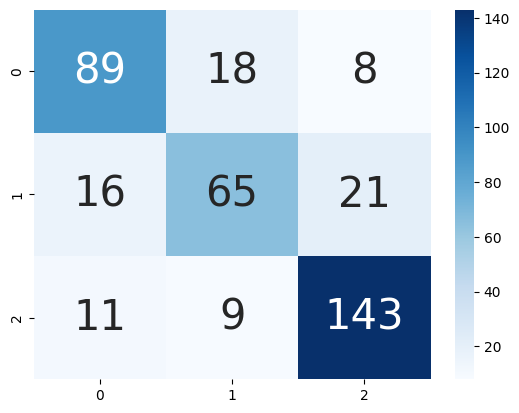

In [41]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mtb

result = np.array([[89, 18, 8],
                  [16, 65, 21],
                  [11, 9, 143]])

sns.heatmap(result, annot=True, fmt='', cmap='Blues', annot_kws={'size': 30})
